# Contents
* Singular Value Decomposition (SVD)
* Principal Component Analysis (PCA)
* Proper Orthogonal Decomposition (POD)
* Dynamic Mode Decomposition (DMD)
* Time-delayed Embeddings

## Linear Transformations

$x = \left[\begin{array}{ccc} 
1 \\
3
\end{array}\right],\; \mathbf{A}=\left[\begin{array}{ccc} 
2 & 1 \\
-1 & 1
\end{array}\right] \rightarrow \,y=\mathbf{Ax}=\left[\begin{array}{ccc} 
5 \\
2
\end{array}\right]$

**Rotation**
$\mathbf{A}=\left[\begin{array}{ccc} 
\text{cos}\theta & \text{-sin}\theta \\
\text{sin}\theta & \text{cos}\theta
\end{array}\right]$

**Scaling**
$\mathbf{A}=\left[\begin{array}{ccc} 
\alpha & 0 \\
0 & \alpha
\end{array}\right]$

<div class="verticalhorizontal">
    <img src="images/8_1.png" width ="450" height="300" alt="centered image" />
</div>


**SVD Properties**

$\mathbf{A}=\mathbf{U\Sigma V^*} $

$\mathbf{U} \in \mathbb{C}^{mxm}$ is unitary<br>
$\mathbf{V} \in \mathbb{C}^{nxn}$ is unitary<br>
$\mathbf{\Sigma} \in \mathbb{R}^{mxn}$ is diagonal

**Computing SVD - Eigenvalur Problem**

$\begin{align}
\mathbf{A^TA} &= \mathbb{U\Sigma V^*}^T\mathbf{U\Sigma V^*}\\
& = \mathbf{V\Sigma^2V^*}
\end{align}$

$\mathbf{AA^T}= \mathbf{U\Sigma^2U^*}\;\;$ This then will become: $(AA^T)U= U\Sigma^2$.
So eigenvalue is $\Sigma^2$, eigenvector is $U$


**Question**: Are unitary matrices U, V unique? Are the singular values unique? Explain and provide several examples if they are not.

>   No, unitary matrices U, V are not unique. The singular values are unique. Given an A matrix, the function of A acting on any vector is to rotate that vector and scale it by some factor. <br><br>
A = UΣV* acting on any vector means first inverse rotate it by V, scale it, then rotate by U. Suppose we rotate a vector by 20 degrees, and at the mean time scale it by factor of 3. We can first rotate it by 10 degrees, scale it by factor of 3, then rotate another 10 degrees. Or, we can first rotate it by 30 degrees, scale it by factor of 3, then rotate back 10 degrees. There are many more ways to rotate, but only one way to scale it because we only scale it once. So U, V are not unique. Singular values are unique.<br><br>
Another proof of non-uniqueness of U, V: <br> $A = U\Sigma V^* = U\Sigma WW^*V^* = (UW)\Sigma (W^*V^*) = (UW)\Sigma (VW)^*$
So U, V could be replaced by any other combinations with W, where W is a unitary matrix.

**Properties of SVD**

* **Theorem**: The *nonzero singular values* of $\mathbf{A}$ are the square roots of the nonzero eigenvalues of $\mathbf{A^*A}$ or $\mathbf{AA^*}$ 
* **Theorem**: The norm $||\mathbf{A}||_2 =\sigma_1$ (max eigenvalues) and $||\mathbf{A}||_F = \sqrt{\sigma_1^2+\sigma_2^2+ \cdot\cdot\cdot+\sigma_r^2} $
* **Theorem**: For any N so that $0\le N\le r$, we can define the partial sum 

    $$\mathbf{A}_N =\sum_{j=1}^N \sigma_j \mathbf{u}_j\mathbf{v}_j^* $$
    $||\mathbf{A}-\mathbf{A_N}||_N = \sqrt{\sigma_{N+1}^2+\sigma_{N+2}^2+\cdot\cdot\cdot+\sigma_r^2} $


## PCA 
subtract the mean for all variables, define the covariance matrix $X^TX$. 

**Embedding** 
Project each point on Principal axies - low dimension embedding

## POD

$ f(x,t)\approx \sum_{j=1}^N a_j(t)\phi_j(x) \rightarrow \; F(x,t)\approx U(x)\Sigma V(t)^T $ 



## DMD

DMD: Computes a set of **modes** associated with fixed **oscillation frequencies** and **decay/growth** rates for given multi dimensional time series.

Predict the next snapshot from previous one:  $v_{i+1}=Av_i $

**Algorithm**<br>
Assume that we've taken *m* measurements from specific points in sapce for *n* time spoints, where for now assume that $n<m$. Define the data matrix as :

$X =\left[\begin{array}{ccc}
| & | & &| \\
\vec{x_1} & \vec{x_2} &...&\vec{x_{n}}\\
| & | & &| \\
\end{array}
\right] $ 
<br>Define two matrices $X^*$ and $Y$, such that we can write $Y \approx AX^*$,

$X^* =\left[\begin{array}{ccc}
| & | & &| \\
\vec{x}_1 & \vec{x}_2 &...&\vec{x}_{n-1}\\
| & | & &| \\
\end{array}
\right] $ 
<br>
$Y =\left[\begin{array}{ccc}
| & | & &| \\
\vec{x}_2 & \vec{x}_3 &...&\vec{x}_n\\
| & | & &| \\
\end{array}
\right] $ 
<br> if *n* is small, this is relatively easy to compute - however, if *n* is large, we use SVD. 

Let $X^* = U\Sigma V^T$ and $X^+=V\Sigma^{-1}U^T$ <br>

such that we can write <br>

$YX^+=YV\Sigma^{-1}U^T=AX^*X^+=A$<br>

Additionally, if we assume that $rank(X^*)=r\le n$, then we can use the truncated SVD such that<br>

$U_r = U[:,:r]$, $V^T = V^T[:r,:]$, as well as $\Sigma_r= \Sigma[:r,:r]$,<br>

Now we have a low-rank system, we can apply similarity transformation to *A* to reduce its dimensionality, without changing its spectrum. Using our spatial singular vectors $U$, we define 

$\begin{align*}
\tilde{A}&=U_r^TAU_r\\
&=U_r^T(YV_r\Sigma_r^{-1}U_r^T)U_r\\
&=U_r^TYV_r\Sigma_r^{-1}
\end{align*}$<br>

where $\tilde{A} \in \mathbb{R}^{r\times r}$. We now have a reduced-dimensional representation of our linear operator, from which we can compute the spatial modes and dynamic behavior of each mode. First, however, because of the notion of variance captured by the singular values of our original predictor matrix, we weight $\tilde{A}$ by the singular values as

$$\hat{A}=\Sigma^{1/2}A\Sigma^{1/2}$$

such that our computed spatial modes have been weighted by the amount they contribute to our measured signal. We can now compute the eigendecomposition of $\hat{A}$ as <br>

$$\hat{A}W=W\Lambda $$

So that spatial modes becomes $\Phi = X^*(V\Sigma^{1/2})W$ .


## Time Delay Embeddings

Build delay matrix for variable $x_1$, $H = [x_1;x_1^\delta;...;x_1^{(k+1)\delta}] \;\; H =U\Sigma V^T$
Takens's Therorem: Attractor with dim *d* can be embedded in Euclidean space with *k>2d* lags.

Example: Lorentz attractor

## PCA Embedding - Truncation

d dimension -> lower (2d) dimension

## Manifold Learning

**manifold learning**: a subfiled of machine learning closely related to dimension reduction based on the assumption that one's observed data lie on a low-dimensional manifold embedded in a higher-dimensional space.

* Manifold Visualization
* Manifold approximation

## Multidimensional Scaling (MDS)

Multidimensional scaling is a **visual representation of distances or dissimilarities between sets of objects** "Objects" can be any kind of real or conceptual stimuli (e.g. colors, faces, map coordinates, etc).

* Objects that are more similar (or have shorter distances) are closer together on the graph than objects that are less similar (or have longer distances).
* MDS can also serve as a dimension reduction technique for high-dimensional data, as well as interpreting dissimilarities as distances on a graph.

**MDS Algorithm**

Compute pairwise distance between all pairs of points

$D:= \left[\begin{array}{ccc} 
d_{1,1} & d_{1,2} & ... & d_{1,M}\\
d_{2,1} & d_{2,2} & ... & d_{2,M} \\
. &. & &.\\
. &. & &.\\
. &. & &.\\
d_{M,1} & d_{M,2} &... & d_{M,M}
 \end{array}\right]$

 $d_{ij} = ||x_i-x_j|| $

 Center the matrix D (double centering in rows and columns)  $\tilde{D} -> EVD(U\sqrt{\Sigma})$



**Question**: Consider $D_{n\times n}=[d_{ij}^2], $ a matrix of squared pairwise Euclidean distances between variables in the matirx $X_{n\times k}$ (rows are variables, columns are observations). Show that eigenvalues $\lambda_m$ and eigenvectors $\vec{u_m}$ of $\tilde{D}_{n\times n}$, a matrix $D$ that is centered in rows and columns, correspond to $\lambda_m=s_m^2,\vec{u_m}$ respectively, where $s_m$ are diagonal elements in $S$ and $\vec{u_m}$ are vectors in $U$, such that $X=USV^T,$ i.e. SVD of a centered matrix $X.$

This thus shows that MDS (finding representation that preserves Euclidean distances of points in $X$) and PCA of $X$ are equivalent.
 

> Consider the $D$ matrix, with $d_{ij}= ||x_i-x_j||^2$, where $\displaystyle X    =\left(\begin{array}{ccc}  
   x_1\\
   \hline
   x_2\\
   \hline
   .\\.\\.\\\hline x_n
   \end{array}\right) $<br>
   $d_{ij}= ||x_i-x_j||^2 = x_i^2 -2x_i\cdot x_j+x_j^2$.<br><br>
   Specifically, $D := \left(\begin{array}{ccc}  
   0 & ||x_1-x_2||^2 & ...\\
   ||x_2-x_1||^2 & 0 & ...\\
   ...\\...\\
   ||x_n-x_1||^2& ...&0
   \end{array}\right)$<br><br>
   We want to double center the $D$ matrix, in a way that:<br><br>
   Sum of rows $s_i = \displaystyle \sum_j d_{ij}^2 = \displaystyle \sum_j  x_i^2 -2x_i\cdot x_j+x_j^2 = nx_i^2-2x_i\cdot\sum_j x_j + \sum_jx_j^2$.<br><br>
   Sum of all entries in $D:$ $$s= \displaystyle \sum_i s_i = n\sum_i x_i^2 -2\sum_i x_i \cdot \sum_j x_j+ \sum_i\sum_jx_j^2=2n\sum_ix_i^2-2\sum_i x_i \cdot \sum_j x_j$$<br>
   Centering by columns such that $\displaystyle\sum_i x_i =0$, we get:<br><br>
   $s_i=nx_i^2+\displaystyle\sum_jx_j^2$ <br>
   $s=\displaystyle 2n\sum_i x_i^2$<br><br>
   Now we have, $$d_{ij}-\frac{s_i+s_j-\frac{1}{n}s}{n} = -2x_i\cdot x_j$$<br>
   Divide this by -2, we have $\tilde{D}$ matrix, making the equation above to be, $RHS= x_i\cdot x_j$<br><br>
   Consider the matrix $XX^T$, each entry $(XX^T)_{ij} = x_i\cdot x_j$.<br><br>
   Thus the two matrices are equivalent. The results of SVD must be equivalent too. And the singular value for $A$ is indeed the square root of the singular value for $\tilde{D}$ with the same eigenvectors.



 ## ISOMAP

 **Isomap: nonlinear dimensionality reduction** estimating the intrinsic geometry of a data manifold based on a rough estimate of each data point's neighbors on the manifold.

 * **Determine the neighbors of each point**<br>
    All points in some fixed radius<br>
    K nearest neighbors
* **Construct a neigborhood graph**<br>
   Each point is connected to other if it is a *K* nearest neighbor<br>
   Edge length equal to Euclidean distance
* **Compute shortest path between two nodes**<br>
   Dijkstra's algorithm<br>
   Floyd-Warshall algorithm
* **Compute lower-dimensional embedding**<br>
   Multidimensional scaling

   


## t-SNE: T Stochastic Neighborhood Embedding

Optimization approach. 

**Crowding Problem**: It is impossibl to preserve distance in all Neighborhoods<br>
**Possible solution**: t-distribution

If points are crowded, t-distribution looks like standard normal distribution. If they are sparse, t-distribution is more flat and smooth.

<div class="verticalhorizontal">
    <img src="images/8_2.png" width ="450" height="350" alt="centered image" />
</div>

## (Temporal) Force Directed Graphs

Embedding -> Visualization

# Embedding and Clustering

* UMAP
* Clustering
* K Means
* K Nearest Neighbors (KNN)

## UMAP
**Uniform Manifold Aapproximation and Projection**<br>

Mclnnes, Leland, John Healy, and James Melville. Umap(2018)<br>

**Neighbor Graph**

one point - 0 simplex, two points connected - 1 simplex

The idea is that define a ball of radius r for each data point. For sparse region, the data points have larger radius. For dense region, they have smaller radius. It is complicated to measure the density of data points, we instead find the associated k nearest neighbors. This is a hyperparameter to tune. 

Example: UMAP on MNIST hand-written digits, unsupervised learning. 

## Clustering

### K-Means
* Unsupervised 
* K - number of clusters (centers)
* Edclidean Distance
* Iterative Process

* An iterative clustering algorithm
- Initialize: Pick *K* random points as cluster centers
- Alternate:
    1. Assign data points to closest cluster center
    2. Change the cluster center to the average of its assigned points
- Stop when no points' assignments change

**Properties of K-means algorithm**
* Guaranteed to converge in a finite number of iterations
* Running time per iteration
    1. Assign data points to closest cluster center<br>
    O(KN) time
    2. Change the cluster...<br>
    O(N)
* Symmetric
    - D(A,B) =D(B,A)
    - Otherwise, we can say A looks like B but B does not look like A
* Positivity, and self-similarity
    - D(A,B) $\ge$ 0, and D(A,B)=0 iff A=B
    - Otherwise there will be different objects that we cannot tell apart
* Triangle inequality
    - D(A,B) +D(B,C) $\ge$ D(A,C)
    - Otherwise one can say "A is like B, B is like C, but A is not like C at all"

**K-means Convergence**: K-means taks an alternating optimization approach, each step is guaranteed to decrease the objective - thus guaranteed to converge

**K-Means Initialization**
* K-means algorithm is a heuristic
    - Requires inital means
    - It does matter what you pick!<br>
    - What can go wrong?
    - Various schemes for preventing this kind of thing: variance-based split/merge, initialization heuristics


In [1]:
import torch
import matplotlib.pyplot as plt

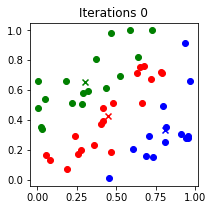

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

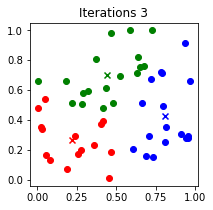

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

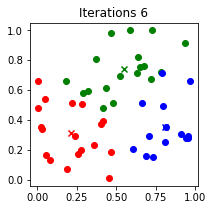

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

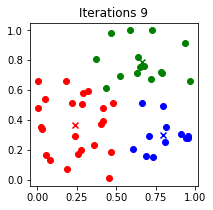

In [30]:

## K Means Clustering
epochs = 10

x = torch.rand(50,2)
N,D = x.shape    # N number of samples, D dimension of one sample in space

K =3 # number of clusters

c = x[:K,:].clone() # use for updating cluster centers, initialize it with first 3 samples

xx= torch.Tensor(x.view(N,1,D))  ## dimension view (N,1,D)
yy= torch.Tensor(c.view(1,K,D))  ## dimension view (1,K,D)

for i in range(epochs):

    # Alternate 1: assign each point to its nearest cluster center
      
    D_xy = ((xx-yy)**2).sum(-1)   ## xx-yy dimension (N,K,D), substract each sample by K cluster centers in K columns 
                               ## and then square and sum to get the distance d**2
    cl = D_xy.argmin(dim=1).long().view(-1)    # for each sample, get the nearest cluster center

    # Alternate 2: update the new cluster centers by the average of summed assigned points in groups
    c.zero_()       # zeros centers
    c.scatter_add_(0, cl[:,None].repeat(1,D),x)  # scatter add function: sum samples assigned to each cluster

    # Divide by the number of samples in each cluster
    Ncl = torch.bincount(cl,minlength=K).type_as(c).view(K,1)
    c/=Ncl
    plt.figure(figsize=(3,3))
    if i%3==0:
        cs=['r','g','b']
        for j in range(K):
            mask=cl==j
            plt.scatter(x[:,0][mask],x[:,1][mask],c=cs[j])
            plt.title(f'Iterations {i}')
            plt.scatter(c[j,0],c[j,1],c=cs[j],marker='x')
        plt.show()    


    
## K-Nearest Neighbors (KNN)
* Learning Algorithm
    - Store training examples
* Prediction Algorithm:
    - To classify a new example x by finding the training example ($x^i,y^i$) that is *nearest* to x
    - Guess the class $y=y^i$